In [86]:
import torch
import torch.nn as nn

In [87]:
import matplotlib.pyplot as plt

In [88]:
slope = 5
X = torch.randn((100,1))
y = X*slope + 3*torch.randn(100,1)

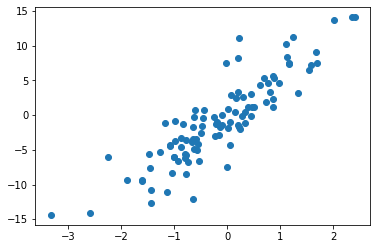

In [89]:
plt.plot(X.numpy(),y.numpy(),'o')

In [90]:
class LR(nn.Module):
    def __init__(self,input_size,output_size):
        super().__init__()
        self.linear = nn.Linear(in_features=input_size,out_features=output_size)
    
    def forward(self,x):
        return self.linear(x)
        

In [91]:
torch.manual_seed(1)

In [92]:
model = LR(1,1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [93]:
def get_params(model):
    [w,b]=model.parameters()
    return  w[0][0].item(),b[0].item()

In [94]:
get_params(model)

(0.5152631998062134, -0.44137823581695557)

In [95]:
import numpy as np

In [96]:
def plot_fit(title,model,X,y,l=-30,u=30):
    plt.title=  title
    w1,b1 = get_params(model)
    x1 = np.array([l,u])
    y1 = w1*x1+b1
    plt.plot(x1,y1,'r')
    plt.scatter(X,y)
    plt.show()

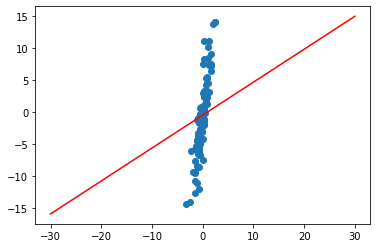

In [97]:
plot_fit("Linear Regress",model,X,y)

In [98]:
criterion = nn.MSELoss()

In [99]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [100]:
epochs = 100

In [101]:
losses = []
for i in  range(epochs):
    y_pred= model.forward(X)
    loss = criterion(y_pred,y)
    print(f"epoch :{i} loss:{loss.item()}")
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

epoch :0 loss:32.63859939575195
epoch :1 loss:31.622419357299805
epoch :2 loss:30.64958953857422
epoch :3 loss:29.718219757080078
epoch :4 loss:28.826522827148438
epoch :5 loss:27.972780227661133
epoch :6 loss:27.15534210205078
epoch :7 loss:26.372652053833008
epoch :8 loss:25.623197555541992
epoch :9 loss:24.905546188354492
epoch :10 loss:24.218332290649414
epoch :11 loss:23.560239791870117
epoch :12 loss:22.930011749267578
epoch :13 loss:22.326448440551758
epoch :14 loss:21.74840545654297
epoch :15 loss:21.194782257080078
epoch :16 loss:20.664533615112305
epoch :17 loss:20.156652450561523
epoch :18 loss:19.67017936706543
epoch :19 loss:19.204198837280273
epoch :20 loss:18.757827758789062
epoch :21 loss:18.330228805541992
epoch :22 loss:17.92060089111328
epoch :23 loss:17.528173446655273
epoch :24 loss:17.152210235595703
epoch :25 loss:16.792011260986328
epoch :26 loss:16.446901321411133
epoch :27 loss:16.11623764038086
epoch :28 loss:15.799403190612793
epoch :29 loss:15.4958114624023

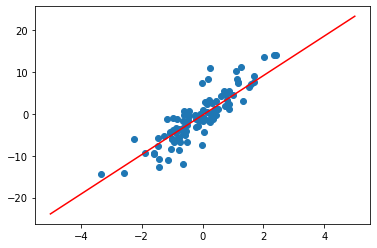

In [105]:
plot_fit("Trained model",model,X,y,-5,5)